## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR=%.6f" % (lr))
    model=build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer=keras.optimizers.SGD(lr=lr,nesterov=True,momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)
    train_loss=model.history.history['loss']
    valid_loss=model.history.history['val_loss']
    train_acc=model.history.history['acc']
    valid_acc=model.history.history['val_acc']
    exp_name_tag='exp_lr-%s' % str(lr)
    results[exp_name_tag]={'train-loss':train_loss,'valid-loss':valid_loss,'train-acc':train_acc,'valid_acc':valid_acc}


Experiment with LR=0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.8395 - acc: 0.3433 - val_loss: 1.6598 - val_acc: 0.4130
Epoch 2/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5952 - acc: 0.4356 - val_loss: 1.5861 - val_acc: 0.4334
Epoch 3/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5090 - acc: 0.4669 - val_loss: 1.5059 - val_acc: 0.4675
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4450 - acc: 0.4871 - val_loss: 1.4765 - val_acc: 0.4749
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3951 - acc: 0.5039 - val_loss: 1.4714 - val_acc: 0.4739
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.3574 - acc: 0.5172 - val_loss: 1.4410 - val_acc: 0.4910
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.3264 - acc: 0.5267 - val_loss: 1.4710 - val_a

50000/50000 [==============================] - 5s 105us/step - loss: 1.7945 - acc: 0.3696 - val_loss: 1.7505 - val_acc: 0.3873
Epoch 3/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.7179 - acc: 0.3965 - val_loss: 1.6904 - val_acc: 0.4039
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6623 - acc: 0.4168 - val_loss: 1.6441 - val_acc: 0.4205
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6172 - acc: 0.4330 - val_loss: 1.6229 - val_acc: 0.4249
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5763 - acc: 0.4480 - val_loss: 1.5681 - val_acc: 0.4452
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5435 - acc: 0.4593 - val_loss: 1.5426 - val_acc: 0.4619
Epoch 8/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5117 - acc: 0.4699 - val_loss: 1.5179 - val_acc: 0.4570
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 116us/step - loss: 2.0620 - acc: 0.2771 - val_loss: 2.0266 - val_acc: 0.2901
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0017 - acc: 0.3011 - val_loss: 1.9744 - val_acc: 0.3134
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9554 - acc: 0.3189 - val_loss: 1.9344 - val_acc: 0.3239
Epoch 6/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.9201 - acc: 0.3296 - val_loss: 1.9049 - val_acc: 0.3351
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8927 - acc: 0.3392 - val_loss: 1.8806 - val_acc: 0.3458
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8697 - acc: 0.3476 - val_loss: 1.8597 - val_acc: 0.3477
Epoch 9/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.8509 - acc: 0.3537 - val_loss: 1.8420 - val_acc: 0.3572
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 141us/step - loss: 2.2530 - acc: 0.1718 - val_loss: 2.2439 - val_acc: 0.1834
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.2384 - acc: 0.1846 - val_loss: 2.2300 - val_acc: 0.1948
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2254 - acc: 0.1981 - val_loss: 2.2178 - val_acc: 0.2045
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.2136 - acc: 0.2074 - val_loss: 2.2066 - val_acc: 0.2163
Epoch 8/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.2027 - acc: 0.2178 - val_loss: 2.1959 - val_acc: 0.2247
Epoch 9/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.1922 - acc: 0.2249 - val_loss: 2.1856 - val_acc: 0.2310
Epoch 10/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.1819 - acc: 0.2319 - val_loss: 2.1754 - val_acc: 0.2388
Epoch 11/50
50000/50000 [===================

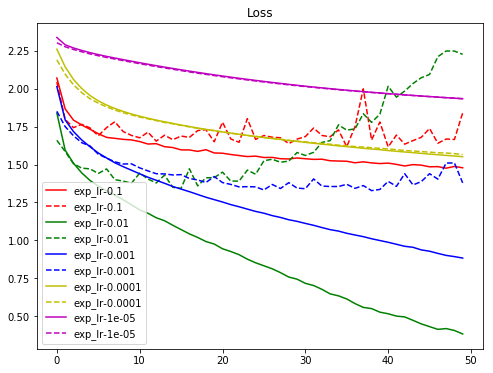

KeyError: 'valid-acc'

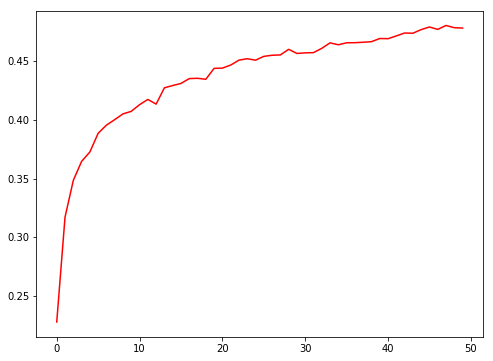

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()